In [1]:
# prerequests
import pandas as pd 
import matplotlib
import os 
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as sts
import seaborn as sns
from scipy.stats import linregress
from scipy import stats as st

In [ ]:
# file upload
file = "Homework/Project1/Resources/new_clean_spotify.csv"
# dataframe
new_df = pd.read_csv(file, encoding='ISO-8859-1')
# clean rows
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
for char in spec_chars:
    new_df["spotify_genre"] = new_df["spotify_genre"].str.replace(char, ' ')


for char in spec_chars:
    new_df["Performer"] = new_df["Performer"].str.replace(char, ' ').drop(columns = ['Unnamed: 0'])
#change date formation
new_df[['Month','Day','Year']] = new_df['WeekID'].apply(lambda x: pd.Series(str(x).split("/")))
new_df.head(5)
pd.to_datetime(new_df['Year']).dt.year.hist() 


In [3]:
# top 40 popular & peak position
popularity_tab =  pd.DataFrame(new_df[(new_df['spotify_track_popularity'] > 60) | (new_df['spotify_track_popularity'] == 60)].sort_values( 
    by='spotify_track_popularity', ascending=False, inplace=False))
popularity_tab.reset_index(inplace=True)
pro_df = pd.DataFrame(popularity_tab.loc[(popularity_tab['Peak Position']< 40) | (popularity_tab['Peak Position'] == 40)])
pro_df.describe()

,index,Unnamed: 0,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart
count,60286.000000,60286.000000,60286.000000,60286.000000,60286.000000,60286.000000,60286.000000,60286.000000,60286.000000,60286.000000,...,60286.000000,60286.000000,60286.000000,60286.000000,60286.000000,60286.000000,60286.000000,60286.000000,60286.000000,60286.000000
mean,111399.801629,138319.339067,235981.153186,70.781657,0.643186,0.661060,5.246143,-7.003279,0.667949,0.084801,...,0.013331,0.173298,0.562132,120.192929,3.975965,26.514299,1.117589,25.431261,12.808048,15.921275
std,75828.530447,95815.775386,49640.308595,7.701787,0.147692,0.177797,3.593407,3.038357,0.470953,0.089442,...,0.078419,0.139431,0.236072,27.578700,0.243287,21.074850,0.453739,19.129177,11.480084,9.922681
min,1.000000,19.000000,76214.000000,60.000000,0.149000,0.021000,0.000000,-24.709000,0.000000,0.022400,...,0.000000,0.021000,0.037100,37.114000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,43600.250000,52946.250000,205106.000000,65.000000,0.546000,0.537000,2.000000,-8.607000,0.000000,0.033700,...,0.000000,0.088400,0.375000,98.329000,4.000000,10.000000,1.000000,10.000000,3.000000,9.000000
50%,111839.500000,137783.500000,230586.000000,70.000000,0.653000,0.679000,5.000000,-6.340000,1.000000,0.047200,...,0.000000,0.119000,0.571000,119.749000,4.000000,22.000000,1.000000,22.000000,9.000000,14.000000
75%,171010.750000,209490.750000,260640.000000,76.000000,0.748000,0.801000,8.000000,-4.872000,1.000000,0.088800,...,0.000102,0.214000,0.755000,136.209000,4.000000,37.000000,1.000000,37.000000,21.000000,20.000000
max,252844.000000,320759.000000,547733.000000,100.000000,0.978000,0.997000,11.000000,-1.152000,1.000000,0.740000,...,0.959000,0.989000,0.990000,211.261000,5.000000,100.000000,9.000000,100.000000,40.000000,87.000000


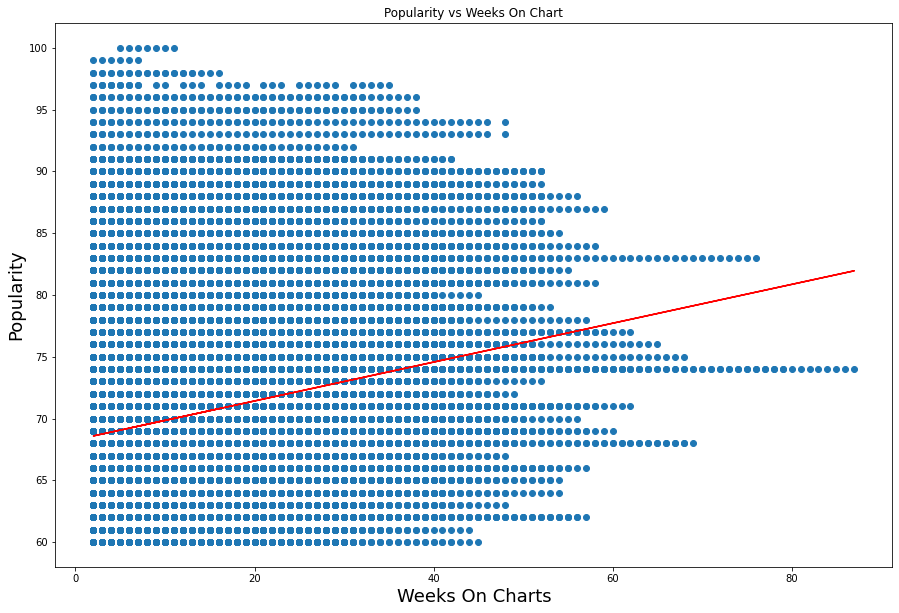

In [4]:
from scipy.stats import linregress

x_values = pro_df['Weeks on Chart']
y_values =  pro_df['spotify_track_popularity']
# Perform a linear regression on weight versus tumor volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# Create equation of line to calculate predicted tumor volumes
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# figure 2
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
ax.set_title('Popularity vs Weeks On Chart')
ax.set_xlabel("Weeks On Charts", fontsize=18)
ax.set_ylabel("Popularity", fontsize=18)
plt.show()

In [5]:
# popularity vs Weeks on chart
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.2


In [6]:
# popular song through years
song_table = pro_df.pivot_table(index=['Year'], values=['SongID', 'Weeks on Chart'],  aggfunc='count').reset_index()
song_table.sort_values(['SongID'], ascending=False)

,Year,SongID,Weeks on Chart
61,2019,3743,3743
60,2018,2527,2527
56,2014,2385,2385
57,2015,2329,2329
58,2016,2315,2315
59,2017,2259,2259
54,2012,2187,2187
55,2013,2115,2115
53,2011,1968,1968
52,2010,1796,1796


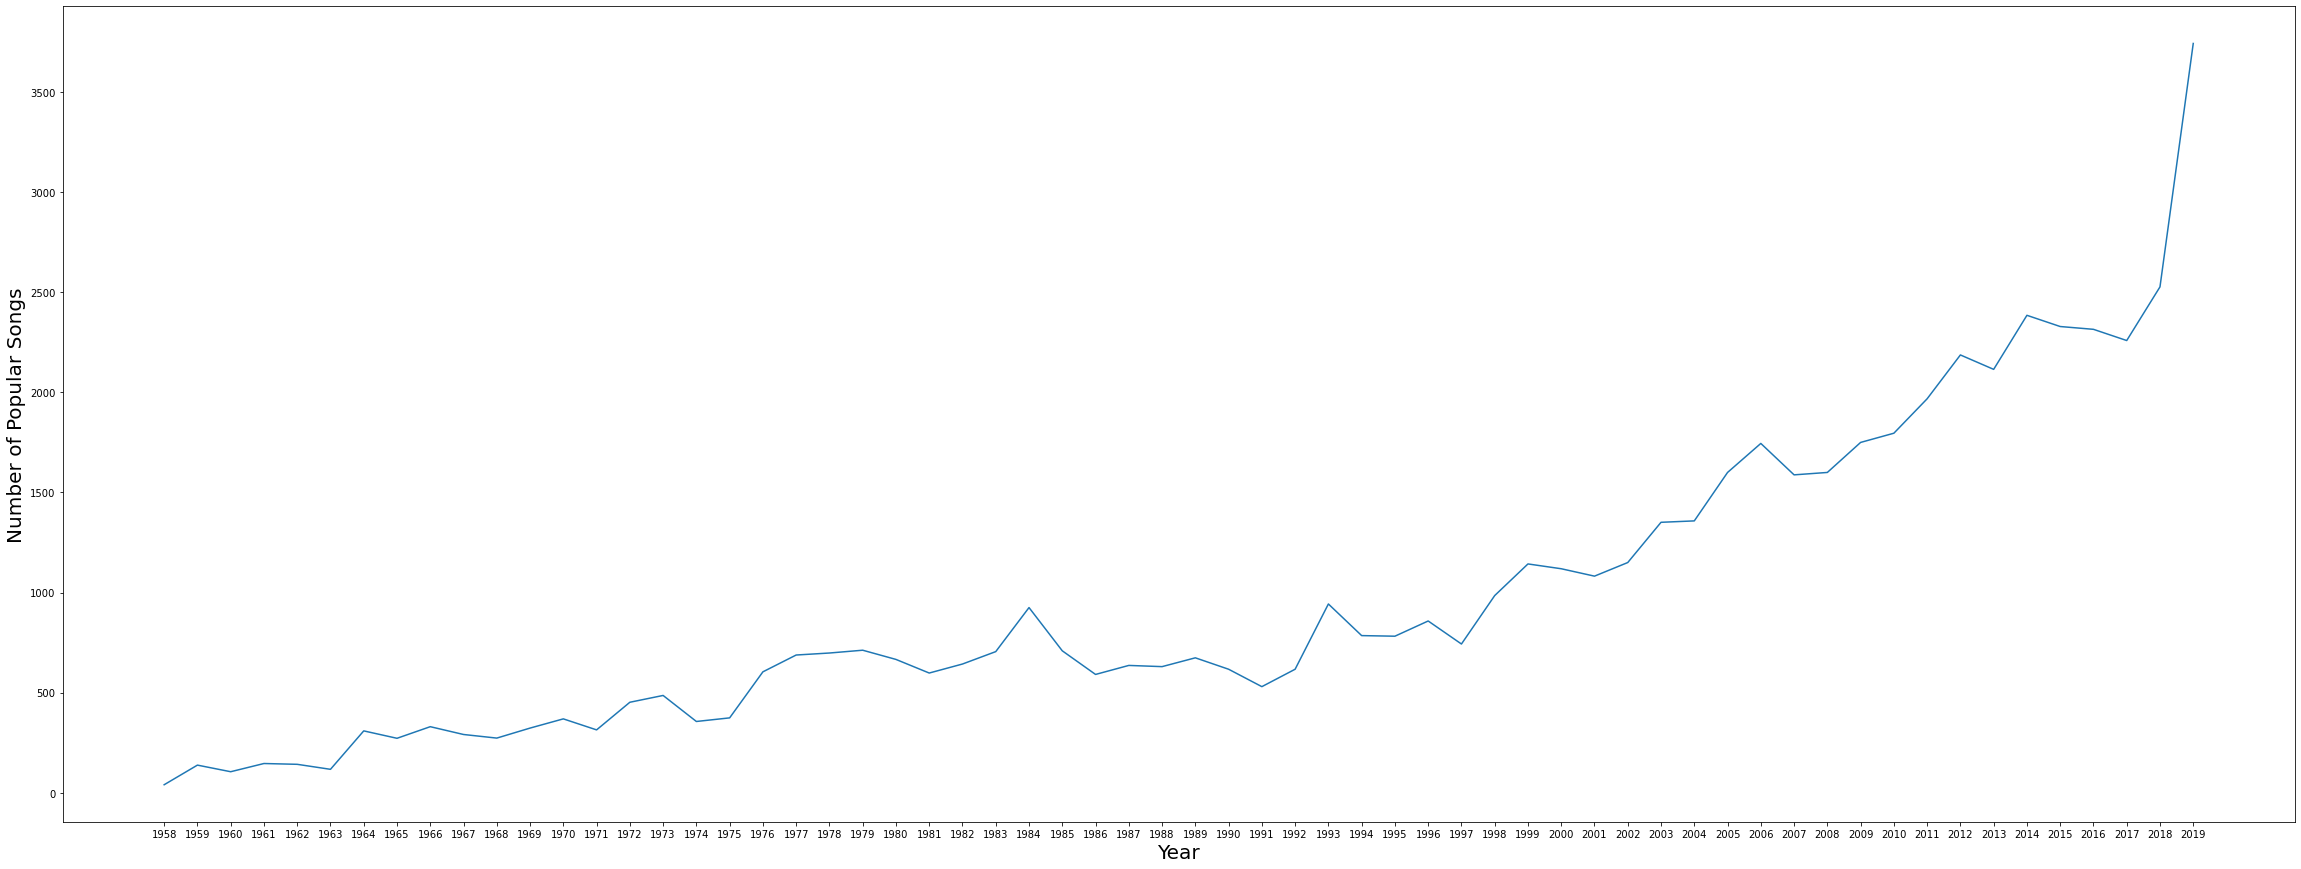

In [39]:
fig, ax = plt.subplots(figsize=(40, 15))
ax.plot(song_table['Year'], song_table['SongID']) 
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Number of Popular Songs', fontsize=20)
plt.show()

In [ ]:
# song popularity increased with internet widespread 

In [31]:
song_year = pro_df.pivot_table(index=['Performer'], values=['Weeks on Chart'],  aggfunc='count')
top_performer = song_year.sort_values(['Weeks on Chart'], ascending=False).head(20)
top_performer.head()

,Weeks on Chart
Performer,
Taylor Swift,482
Drake,462
Rihanna,378
The Beatles,329
Michael Jackson,320


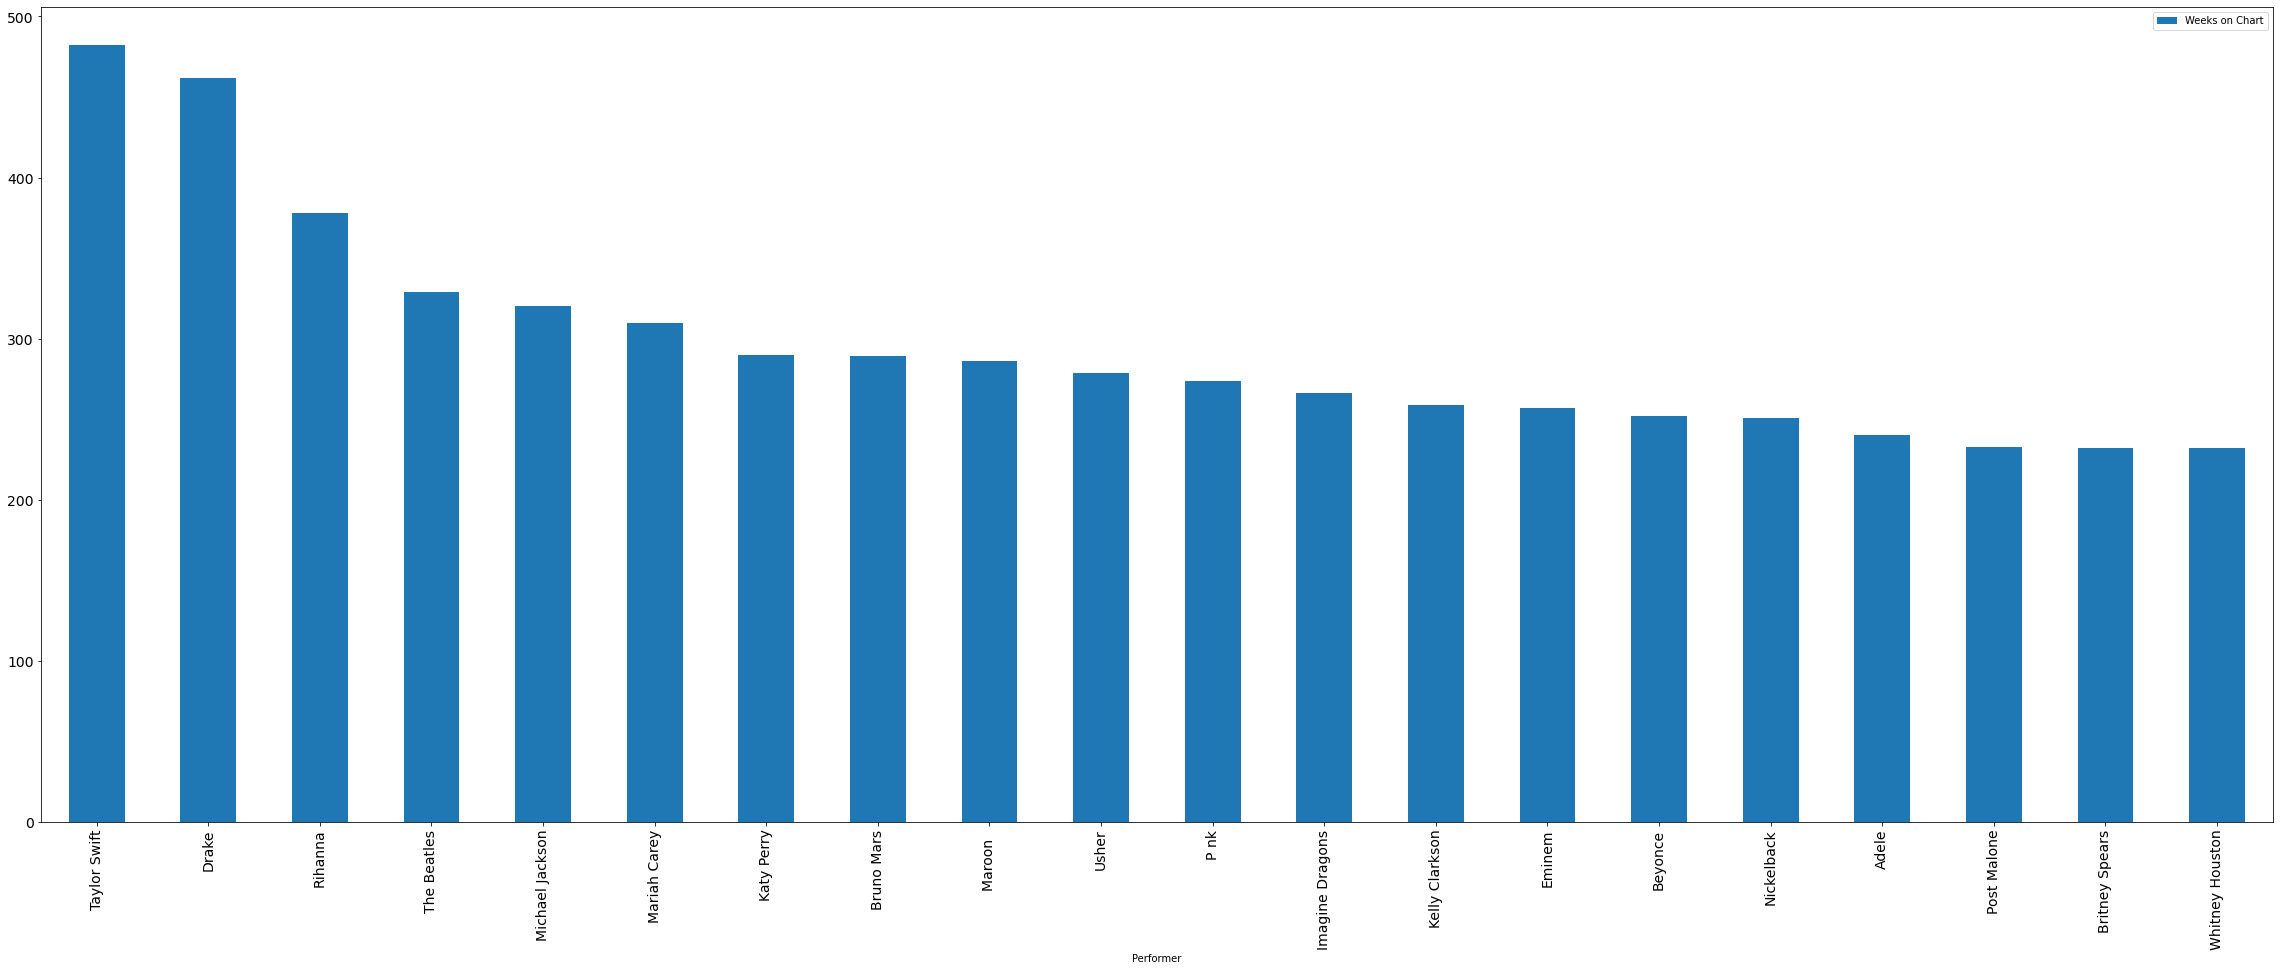

In [36]:
top_performer.plot(kind='bar', figsize=(40, 15), fontsize=(14))


In [48]:
performer_year = pro_df.pivot_table(index=['Performer', 'Year'], values=['Weeks on Chart'],  aggfunc='count')
performer_year

Weeks on Chart
Performer                                          Year                
                                                   1997              25
                                                   2001              45
                                                   2002               4
    Featuring The Notorious B I G                  1996              26
   Savage                                          2017              22
                                                   2018               5
                                                   2019              22
   Savage   Metro Boomin Featuring Future          2016               6
                                                   2017               7
   Savage  Offset   Metro Boomin Featuring Trav... 2017               6
   Special                                         1981              10
                                                   1982              14
  Chainz                                           2013              15
  Chainz   Wiz Khalifa                             2013               6
  Chainz Featuring Drake                           2012              20
  Doors Down                                       2000              25
                                                   2001              27
                                                   2002               1
                                                   2003              54
                                                   2004              33
                                                   2008              19
  Non Blondes                                      1993              20
  Seconds Of Summer                                2014              34
                                                   2015               8
                                                   2018              24
                                                   2019              19
 0                                                 1999              33
                                                   2000               7
 0 Cent                                            2003              28
                                                   2004               2
...                                                                 ...
Zedd   Alessia Cara                                2017              30
Zedd  Maren Morris   Grey                          2018              39
Zedd Featuring Foxes                               2013              25
Zedd Featuring Hayley Williams                     2013               6
                                                   2014               9
Zedd Featuring Selena Gomez                        2015              15
Zendaya                                            2014               3
a ha                                               1985              19
                                                   1986               2
benny blanco  Halsey   Khalid                      2019              29
fun                                                2012              26
                                                   2013              27
fun  Featuring Janelle Monae                       2012              35
gnash Featuring Olivia O Brien                     2016              22
                                                   2017               4
lovelytheband                                      2018              10
matchbox  0                                        1998               1
matchbox twenty                                    2000               9
                                                   2001              31
                                                   2003              38
                                                   2004              13
                                                   2007              15
                                                   2008               6
t A T u                  

In [55]:
performer = performer_year.sort_values(['Weeks on Chart'], ascending=False).head(40)

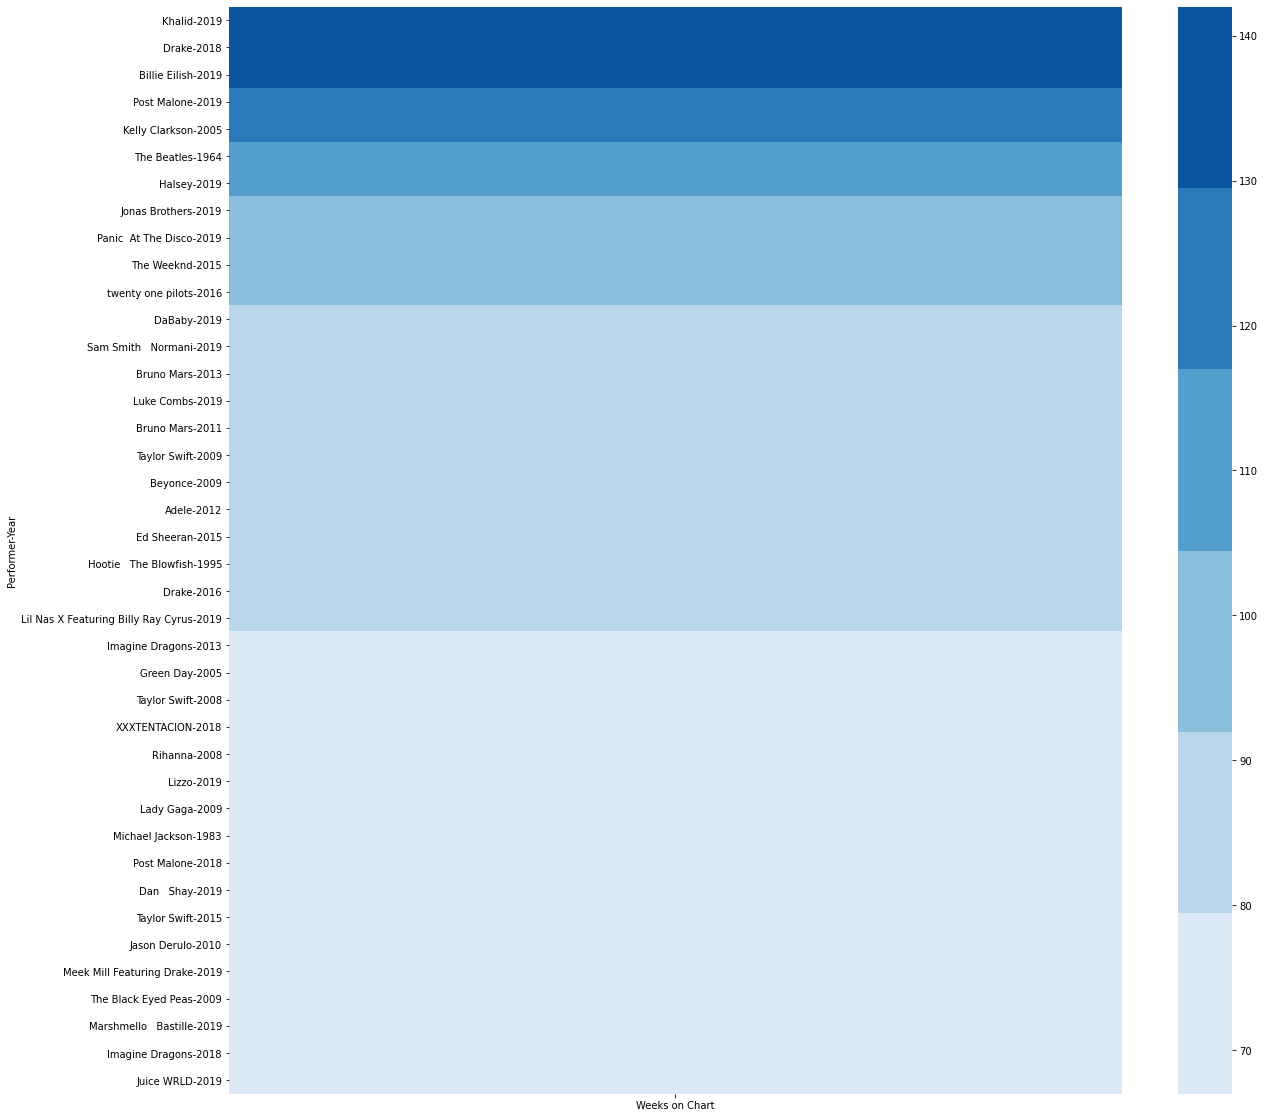

In [56]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data=performer, 
            cmap=sns.color_palette("Blues"),
            ax=ax)

plt.show()
